In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from copy import deepcopy

from scipy.optimize import curve_fit

%matplotlib widget

In [2]:
def linear_model(x, a, c):
    return a * x + c

def quadratic_model(x, a, b, c):
    return a*x**2 + b*x + c

In [3]:
savepath = '/Users/zgl12/Modules/SN2019vxm/Telescopes_Scripts/TESS/Control_Curves/'

In [4]:
files = sorted(glob(savepath + '*17*.csv'))

files[0]

'/Users/zgl12/Modules/SN2019vxm/Telescopes_Scripts/TESS/Control_Curves/tess_sector_17_aperture_calib_1.csv'

In [5]:
df = pd.read_csv(files[0])

df = df[(df['flux'] != 0) & ((df['m'] != 15))].reset_index(drop=True)

diffs = np.abs(np.diff(df.MJD))
indices = np.where(diffs > 0.5)[0]

print("Indices with difference > 1:", indices)

ind1 = indices[0] - 20
ind2 = indices[0]
ind3 = df.index.values[-45]

Indices with difference > 1: [553]


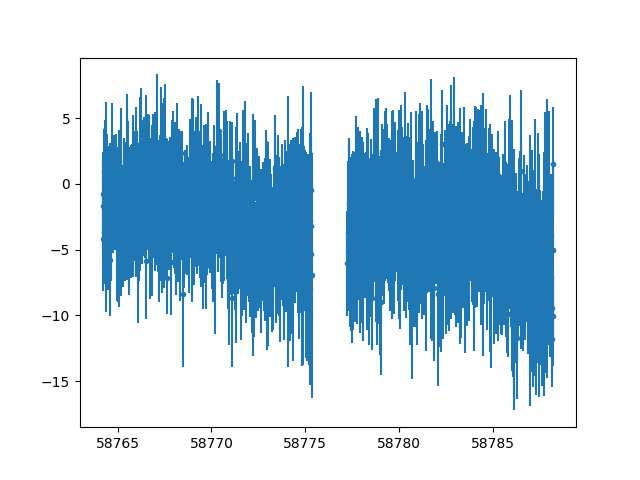

In [6]:
mjds = deepcopy(df.MJD.values)
fluxes = deepcopy(df.flux.values)
d_fluxes = deepcopy(df.dflux.values)

mjds[ind1:ind2+1] = np.nan
mjds[ind3:] = np.nan

fluxes[ind1:ind2+1] = np.nan
fluxes[ind3:] = np.nan

d_fluxes[ind1:ind2+1] = np.nan
d_fluxes[ind3:] = np.nan

plt.figure()
plt.errorbar(mjds, fluxes, d_fluxes, fmt = '.')
plt.axvline(mjds[ind1], color = 'r')
plt.axvline(mjds[ind2], color = 'r')
plt.axvline(mjds[ind3], color = 'r')
plt.show()

In [7]:
# component1

guess_lin = [1, 2.1e+04]
guess_qua = [1, 1, 2.1e+04]

popt_lin_1, pcov_lin_1 = curve_fit(linear_model, mjds[:ind1], fluxes[:ind1], sigma = d_fluxes[:ind1], 
                                   p0 = guess_lin, absolute_sigma=True)
popt_lin_2, pcov_lin_2 = curve_fit(linear_model, mjds[ind2+1:ind3], fluxes[ind2+1:ind3], sigma = d_fluxes[ind2+1:ind3], 
                                   p0 = guess_lin, absolute_sigma=True)

popt_qua_1, pcov_qua_1 = curve_fit(quadratic_model, mjds[:ind1], fluxes[:ind1], sigma = d_fluxes[:ind1], 
                                   p0 = guess_qua, absolute_sigma=True)
popt_qua_2, pcov_qua_2 = curve_fit(quadratic_model, mjds[ind2+1:ind3], fluxes[ind2+1:ind3], sigma = d_fluxes[ind2+1:ind3], 
                                   p0 = guess_qua, absolute_sigma=True)

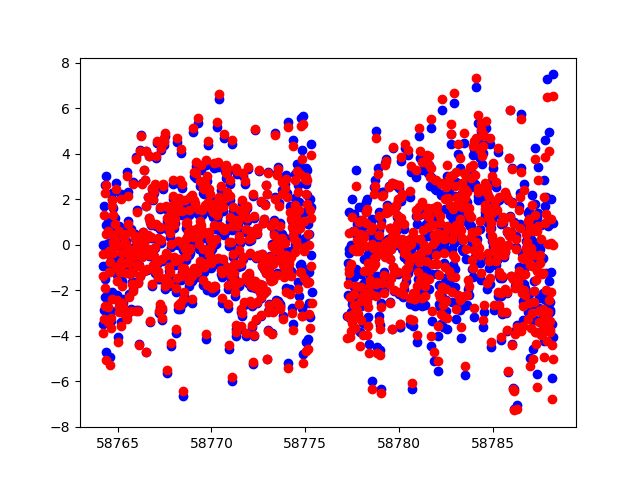

In [8]:
plt.figure()
plt.scatter(mjds[:ind1], fluxes[:ind1] - quadratic_model(mjds[:ind1], *popt_qua_1), color = 'b')
plt.scatter(mjds[ind2+1:ind3], fluxes[ind2+1:ind3] - quadratic_model(mjds[ind2+1:ind3], *popt_qua_2), color = 'b')

plt.scatter(mjds[:ind1], fluxes[:ind1] - linear_model(mjds[:ind1], *popt_lin_1), color = 'r')
plt.scatter(mjds[ind2+1:ind3], fluxes[ind2+1:ind3] - linear_model(mjds[ind2+1:ind3], *popt_lin_2), color = 'r')

plt.show()

In [9]:
mjds[:ind1].tolist()

[58764.19903564453,
 58764.21990966797,
 58764.24072265625,
 58764.26153564453,
 58764.28240966797,
 58764.30322265625,
 58764.32403564453,
 58764.34490966797,
 58764.36572265625,
 58764.38653564453,
 58764.40740966797,
 58764.42822265625,
 58764.44903564453,
 58764.46990966797,
 58764.49072265625,
 58764.51153564453,
 58764.53240966797,
 58764.55322265625,
 58764.57403564453,
 58764.59490966797,
 58764.61572265625,
 58764.63653564453,
 58764.65740966797,
 58764.67822265625,
 58764.69903564453,
 58764.71990966797,
 58764.74072265625,
 58764.76153564453,
 58764.78240966797,
 58764.80322265625,
 58764.82403564453,
 58764.84490966797,
 58764.86572265625,
 58764.88653564453,
 58764.90740966797,
 58764.92822265625,
 58764.94903564453,
 58764.96990966797,
 58764.99072265625,
 58765.01153564453,
 58765.03240966797,
 58765.05322265625,
 58765.07403564453,
 58765.09490966797,
 58765.11572265625,
 58765.13653564453,
 58765.15740966797,
 58765.17822265625,
 58765.19903564453,
 58765.21990966797,


In [15]:
files[0].split('_sector_')[1].split('_')[1]

'aperture'